<a href="https://colab.research.google.com/github/Y-Srivaishnavi/simple_neural_architecture_search/blob/main/with_bayes_opt/NAS_ANN_HARdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/G-project/datasets/har/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/G-project/datasets/har/train.csv')

In [ ]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Divide data into dependent and independent features

In [ ]:
X_train = train_df.drop('Activity', axis=1)
y_train = train_df['Activity']

In [ ]:
y_train.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

Note: in `get_dummies`, kwarg `drop_first=True` is used to decrease number of new features made, by 1.

Since softmax is being used, we need to perform one-hot encoding on `y_train`

In [ ]:
y_train_soft = pd.DataFrame.to_numpy(pd.get_dummies(y_train))

In [ ]:
y_train_soft

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)

In [ ]:
X_train_s

array([[ 0.20064157, -0.0636826 , -0.41962845, ...,  0.40794614,
        -0.00756789, -1.8288513 ],
       [ 0.05594788,  0.03148567, -0.25390836, ...,  0.40911698,
         0.00787517, -1.8288513 ],
       [ 0.07351535, -0.04341648, -0.07629468, ...,  0.4102883 ,
         0.02650234, -1.8288513 ],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ...,  0.64059683,
         0.34870928,  1.4025149 ],
       [ 0.21586648, -0.02812252, -0.86770988, ...,  0.63147758,
         0.29327564,  1.4025149 ],
       [ 1.09620157,  0.12919873, -1.67268082, ...,  0.63274259,
         0.33396081,  1.4025149 ]])

In [ ]:
X_train_s.shape

(7352, 562)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, ReLU, PReLU
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

`units` defines the number of output units

In [ ]:
model.add(Dense(15, activation = 'relu', input_shape = (X_train.shape[1], )))

Mistake 1: `input_shape` was not defined.

In [ ]:
model.add(Dropout(0.5))

Mistake 2: `Dropout` was not added for overfit prevention.

In [ ]:
model.add(Dense(units=100, activation='relu'))

Mistake 3: Two hidden layers had the same number of units.

In [ ]:
model.add(Dense(units=6, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Alternative optimzer, with custom learning rate: `tf.keras.optimzers.Adam(learning_rate=0.02)`

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history = model.fit(X_train_s, y_train_soft, validation_split=0.2, batch_size=10, epochs=1000, callbacks=early_stop)

Epoch 1/1000
589/589 [==============================] - 3s 3ms/step - loss: 0.7568 - accuracy: 0.6691 - val_loss: 0.2731 - val_accuracy: 0.9266
Epoch 2/1000
589/589 [==============================] - 1s 2ms/step - loss: 0.4607 - accuracy: 0.7883 - val_loss: 0.1953 - val_accuracy: 0.9375
Epoch 3/1000
589/589 [==============================] - 2s 3ms/step - loss: 0.3673 - accuracy: 0.8386 - val_loss: 0.1720 - val_accuracy: 0.9361
Epoch 4/1000
589/589 [==============================] - 2s 4ms/step - loss: 0.3256 - accuracy: 0.8628 - val_loss: 0.1590 - val_accuracy: 0.9429
Epoch 5/1000
589/589 [==============================] - 1s 2ms/step - loss: 0.3019 - accuracy: 0.8708 - val_loss: 0.1748 - val_accuracy: 0.9320
Epoch 6/1000
589/589 [==============================] - 1s 2ms/step - loss: 0.2745 - accuracy: 0.8851 - val_loss: 0.1857 - val_accuracy: 0.9266
Epoch 7/1000
589/589 [==============================] - 2s 3ms/step - loss: 0.2632 - accuracy: 0.8910 - val_loss: 0.1709 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plot history

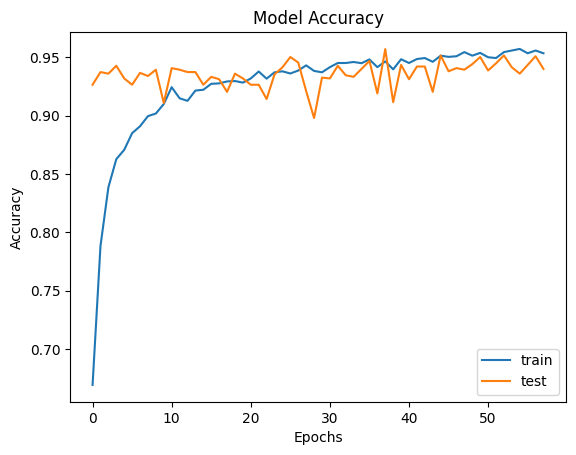

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

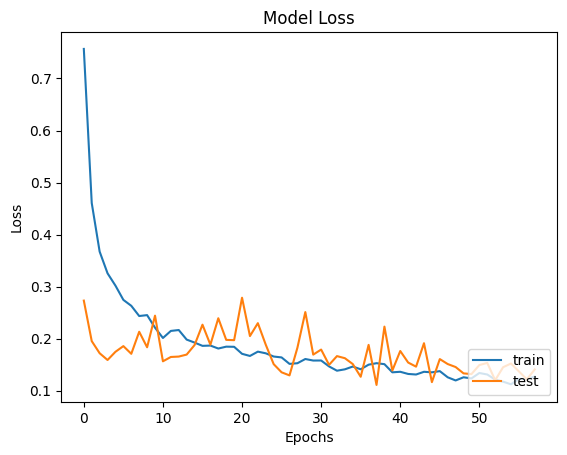

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

`transform` is used to prevent data leakage.

In [ ]:
X_test = ss.transform(test_df.drop('Activity', axis=1))
y_test = pd.DataFrame.to_numpy(pd.get_dummies(test_df['Activity']))

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred >=0.5)

230/230 [==============================] - 0s 1ms/step


In [ ]:
y_pred = y_pred.astype(int)
y_pred

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)
score

0.9668117519042437

In [ ]:
model.get_weights()

[array([[-0.17836902,  0.0393419 ,  0.08546092, ..., -0.08805352,
         -0.1770088 , -0.18975812],
        [-0.05223311, -0.06359968,  0.12854311, ..., -0.02061826,
         -0.21580955,  0.02305715],
        [-0.27555138, -0.18279828, -0.18283848, ..., -0.07509474,
         -0.25427866, -0.1889377 ],
        ...,
        [ 1.0614885 , -0.23843917,  0.20016092, ..., -0.7562771 ,
         -0.1299047 , -0.81352603],
        [ 0.02355971,  0.01636652, -0.01967643, ..., -0.27077284,
         -0.24187562, -0.26692575],
        [ 0.19117245,  0.18370067,  0.17994933, ...,  0.05775584,
         -0.00623095,  0.08514816]], dtype=float32),
 array([ 0.00853741, -0.13322997, -0.98393285, -0.3767723 , -0.0222865 ,
        -0.5156527 , -0.5676416 , -0.26359624, -0.39679334, -0.20139302,
        -0.7996913 , -0.49057087, -0.13181357, -0.2421209 , -0.04735291],
       dtype=float32),
 array([[-0.07119571, -0.8880822 , -0.00525642, ...,  0.3613929 ,
          0.30933264,  0.0573898 ],
        [-0.0

# Neural Architecture Search using BO

We will try to automate finding the optimal ANN hidden layers using NAS.

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from skopt import gp_minimize
from skopt.space import Integer
from skopt.utils import use_named_args

# Define the space of hyperparameters to search
search_space = [
    Integer(1, 3, name='n_layers'),
    Integer(50, 500, name='n_neurons')
]

# Model training and evaluation function
@use_named_args(search_space)
def objective(**params):
    print(f"Training with params: {params}")
    auto_model = Sequential()
    auto_model.add(Dense(15, activation='relu', input_shape = (X_train.shape[1], )))
    for _ in range(params['n_layers'] - 1):
        auto_model.add(Dense(params['n_neurons'], activation='relu'))
    auto_model.add(Dense(6, activation='softmax'))

    auto_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    auto_model.fit(X_train_s, y_train_soft, epochs=5, batch_size=128, verbose=0, validation_split=0.1)
    loss, acc = auto_model.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy: {acc}, Loss: {loss}")
    # We aim to minimize loss, hence return the loss
    return loss

# Perform Bayesian optimization
result = gp_minimize(objective, search_space, n_calls=10, random_state=0)

print(f"Best parameters: {result.x}")
print(f"Best loss: {result.fun}")


Training with params: {'n_layers': 2, 'n_neurons': 430}
Accuracy: 0.9795973896980286, Loss: 0.059193309396505356
Training with params: {'n_layers': 3, 'n_neurons': 431}
Accuracy: 0.9827257990837097, Loss: 0.04784978926181793
Training with params: {'n_layers': 2, 'n_neurons': 223}
Accuracy: 0.9700761437416077, Loss: 0.07614979147911072
Training with params: {'n_layers': 2, 'n_neurons': 76}
Accuracy: 0.9764689803123474, Loss: 0.07410941272974014
Training with params: {'n_layers': 2, 'n_neurons': 265}
Accuracy: 0.9787812829017639, Loss: 0.06333231925964355
Training with params: {'n_layers': 3, 'n_neurons': 266}
Accuracy: 0.97633296251297, Loss: 0.0694354996085167
Training with params: {'n_layers': 2, 'n_neurons': 426}
Accuracy: 0.9787812829017639, Loss: 0.06334543973207474
Training with params: {'n_layers': 2, 'n_neurons': 342}
Accuracy: 0.9770130515098572, Loss: 0.06363251805305481
Training with params: {'n_layers': 2, 'n_neurons': 481}
Accuracy: 0.9783732295036316, Loss: 0.0573826357722

In [ ]:
result

          fun: 0.04784978926181793
            x: [3, 431]
    func_vals: [ 5.919e-02  4.785e-02  7.615e-02  7.411e-02  6.333e-02
                 6.944e-02  6.335e-02  6.363e-02  5.738e-02  1.101e-01]
      x_iters: [[2, 430], [3, 431], [2, 223], [2, 76], [2, 265], [3, 266], [2, 426], [2, 342], [2, 481], [1, 442]]
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                                        n_restarts_optimizer=2, noise='gaussian',
                                        normalize_y=True, random_state=209652396)]
        space: Space([Integer(low=1, high=3, prior='uniform', transform='normalize'),
                      Integer(low=50, high=500, prior='uniform', transform='normalize')])
 random_state: RandomState(MT19937)
        specs:     args:                    func: <function objective at 0x7a99877bdb40>
                                      dimensions: Space([Integer(low=1, high=3, prior='uniform',

The number of neurons seem to be same in both layers, which is not done. Testing another approach.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from skopt import gp_minimize
from skopt.space import Integer
from skopt.utils import use_named_args

# Define the space of hyperparameters to search
search_space = [
    Integer(1, 3, name='n_layers'),
    Integer(50, 500, name='neurons_layer_1'),
    Integer(50, 500, name='neurons_layer_2'),
    Integer(50, 500, name='neurons_layer_3'),
]

# Model training and evaluation function
@use_named_args(search_space)
def objective(**params):
    print(f"Training with params: {params}")
    auto_model = Sequential()
    auto_model.add(Dense(15, activation='relu', input_shape = (X_train.shape[1], )))
    for i in range(1, params['n_layers']+1):
        if i == 1:
          auto_model.add(Dropout(0.5))
        auto_model.add(Dense(params[f'neurons_layer_{i}'], activation='relu'))
    auto_model.add(Dense(6, activation='softmax'))

    auto_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    auto_model.fit(X_train_s, y_train_soft, epochs=5, batch_size=128, verbose=0, validation_split=0.1)
    loss, acc = auto_model.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy: {acc}, Loss: {loss}")
    # We aim to minimize loss, hence return the loss
    return loss

# Perform Bayesian optimization
result = gp_minimize(objective, search_space, n_calls=10, random_state=0)

print(f"Best parameters: {result.x}")
print(f"Best loss: {result.fun}")


Training with params: {'n_layers': 2, 'neurons_layer_1': 430, 'neurons_layer_2': 436, 'neurons_layer_3': 431}
Accuracy: 0.9457290768623352, Loss: 0.19169139862060547
Training with params: {'n_layers': 2, 'neurons_layer_1': 223, 'neurons_layer_2': 184, 'neurons_layer_3': 76}
Accuracy: 0.9627312421798706, Loss: 0.13956427574157715
Training with params: {'n_layers': 2, 'neurons_layer_1': 265, 'neurons_layer_2': 415, 'neurons_layer_3': 266}
Accuracy: 0.937976062297821, Loss: 0.199576273560524
Training with params: {'n_layers': 2, 'neurons_layer_1': 426, 'neurons_layer_2': 202, 'neurons_layer_3': 342}
Accuracy: 0.9394722580909729, Loss: 0.20955298840999603
Training with params: {'n_layers': 2, 'neurons_layer_1': 481, 'neurons_layer_2': 113, 'neurons_layer_3': 442}
Accuracy: 0.9597388505935669, Loss: 0.16647271811962128
Training with params: {'n_layers': 2, 'neurons_layer_1': 410, 'neurons_layer_2': 284, 'neurons_layer_3': 355}
Accuracy: 0.9469532370567322, Loss: 0.17043225467205048
Training

Model could not achieve the accuracy it did earlier. Why? Presumably, the addition of the `Dropout` layer with fixed 0.5 prevented overfitting.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from skopt import gp_minimize
from skopt.space import Integer, Real
from skopt.utils import use_named_args

# Define the space of hyperparameters to search
search_space = [
    Integer(1, 3, name='n_layers'),
    Integer(50, 500, name='neurons_layer_1'),
    Integer(50, 500, name='neurons_layer_2'),
    Integer(50, 500, name='neurons_layer_3'),
]

# Model training and evaluation function
@use_named_args(search_space)
def objective(**params):
    print(f"Training with params: {params}")
    auto_model = Sequential()
    auto_model.add(Dense(15, activation='relu', input_shape = (X_train.shape[1], )))
    for i in range(1, params['n_layers']+1):
        if i == 1:
          auto_model.add(Dropout(0.5))
        auto_model.add(Dense(params[f'neurons_layer_{i}'], activation='relu'))
    auto_model.add(Dense(6, activation='softmax'))

    auto_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    auto_model.fit(X_train_s, y_train_soft, epochs=5, batch_size=10, verbose=0, validation_split=0.1)
    loss, acc = auto_model.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy: {acc}, Loss: {loss}")
    # We aim to minimize loss, hence return the loss
    return loss

# Perform Bayesian optimization
result = gp_minimize(objective, search_space, n_calls=10, random_state=0)

print(f"Best parameters: {result.x}")
print(f"Best loss: {result.fun}")

Training with params: {'n_layers': 2, 'neurons_layer_1': 430, 'neurons_layer_2': 436, 'neurons_layer_3': 431}
Accuracy: 0.9638193845748901, Loss: 0.18396349251270294
Training with params: {'n_layers': 2, 'neurons_layer_1': 223, 'neurons_layer_2': 184, 'neurons_layer_3': 76}
Accuracy: 0.9552502632141113, Loss: 0.16796594858169556
Training with params: {'n_layers': 2, 'neurons_layer_1': 265, 'neurons_layer_2': 415, 'neurons_layer_3': 266}
Accuracy: 0.9268226623535156, Loss: 0.21185779571533203
Training with params: {'n_layers': 2, 'neurons_layer_1': 426, 'neurons_layer_2': 202, 'neurons_layer_3': 342}
Accuracy: 0.975108802318573, Loss: 0.11162668466567993
Training with params: {'n_layers': 2, 'neurons_layer_1': 481, 'neurons_layer_2': 113, 'neurons_layer_3': 442}
Accuracy: 0.8486126065254211, Loss: 0.3405413329601288
Training with params: {'n_layers': 2, 'neurons_layer_1': 410, 'neurons_layer_2': 284, 'neurons_layer_3': 355}
Accuracy: 0.9411044716835022, Loss: 0.1985594779253006
Training

Training was slower when decreasing batch size. Batch size also seems to matter, as `loss` in earlier iterations was not so high.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from skopt import gp_minimize
from skopt.space import Integer
from skopt.utils import use_named_args

# Define the space of hyperparameters to search
search_space = [
    Integer(1, 3, name='n_layers'),
    Integer(50, 500, name='neurons_layer_1'),
    Integer(50, 500, name='neurons_layer_2'),
    Integer(50, 500, name='neurons_layer_3'),
    Real(0.0, 0.5, name='dropout_rate')
]

# Model training and evaluation function
@use_named_args(search_space)
def objective(**params):
    print(f"Training with params: {params}")
    auto_model = Sequential()
    auto_model.add(Dense(15, activation='relu', input_shape = (X_train.shape[1], )))
    for i in range(1, params['n_layers']+1):
        if i == 1:
          auto_model.add(Dropout(params['dropout_rate']))
        auto_model.add(Dense(params[f'neurons_layer_{i}'], activation='relu'))
    auto_model.add(Dense(6, activation='softmax'))

    auto_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    auto_model.fit(X_train_s, y_train_soft, epochs=5, batch_size=128, verbose=0, validation_split=0.1)
    loss, acc = auto_model.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy: {acc}, Loss: {loss}")
    # We aim to minimize loss, hence return the loss
    return loss

# Perform Bayesian optimization
result = gp_minimize(objective, search_space, n_calls=10, random_state=0)

print(f"Best parameters: {result.x}")
print(f"Best loss: {result.fun}")

Training with params: {'n_layers': 2, 'neurons_layer_1': 430, 'neurons_layer_2': 436, 'neurons_layer_3': 431, 'dropout_rate': 0.3117818483929862}
Accuracy: 0.97048419713974, Loss: 0.08900338411331177
Training with params: {'n_layers': 2, 'neurons_layer_1': 184, 'neurons_layer_2': 76, 'neurons_layer_3': 173, 'dropout_rate': 0.238832558660675}
Accuracy: 0.9729325175285339, Loss: 0.0801766961812973
Training with params: {'n_layers': 3, 'neurons_layer_1': 266, 'neurons_layer_2': 227, 'neurons_layer_3': 426, 'dropout_rate': 0.16869808020863422}
Accuracy: 0.9719803929328918, Loss: 0.07485951483249664
Training with params: {'n_layers': 2, 'neurons_layer_1': 216, 'neurons_layer_2': 481, 'neurons_layer_3': 113, 'dropout_rate': 0.4350436291792183}
Accuracy: 0.9666757583618164, Loss: 0.11853403598070145
Training with params: {'n_layers': 2, 'neurons_layer_1': 410, 'neurons_layer_2': 284, 'neurons_layer_3': 355, 'dropout_rate': 0.36031632736295843}
Accuracy: 0.9698041081428528, Loss: 0.10490834712

Increasing number of calls to see if improvement will be visible.


In [ ]:
from tensorflow.keras.utils import to_categorical
from skopt import gp_minimize
from skopt.space import Integer, Real
from skopt.utils import use_named_args

# Define the space of hyperparameters to search
search_space = [
    Integer(1, 3, name='n_layers'),
    Integer(50, 500, name='neurons_layer_1'),
    Integer(50, 500, name='neurons_layer_2'),
    Integer(50, 500, name='neurons_layer_3'),
    Real(0.0, 0.5, name='dropout_rate')
]

# Model training and evaluation function
@use_named_args(search_space)
def objective(**params):
    print(f"Training with params: {params}")
    auto_model = Sequential()
    auto_model.add(Dense(15, activation='relu', input_shape = (X_train.shape[1], )))
    for i in range(1, params['n_layers']+1):
        if i == 1:
          auto_model.add(Dropout(params['dropout_rate']))
        auto_model.add(Dense(params[f'neurons_layer_{i}'], activation='relu'))
    auto_model.add(Dense(6, activation='softmax'))

    auto_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    auto_model.fit(X_train_s, y_train_soft, epochs=5, batch_size=128, verbose=0, validation_split=0.1, callbacks=early_stop)
    loss, acc = auto_model.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy: {acc}, Loss: {loss}")
    # We aim to minimize loss, hence return the loss
    return loss

# Perform Bayesian optimization
result = gp_minimize(objective, search_space, n_calls=20, random_state=0)

print(f"Best parameters: {result.x}")
print(f"Best loss: {result.fun}")

Training with params: {'n_layers': 2, 'neurons_layer_1': 430, 'neurons_layer_2': 436, 'neurons_layer_3': 431, 'dropout_rate': 0.3117818483929862}
Accuracy: 0.975108802318573, Loss: 0.07911065220832825
Training with params: {'n_layers': 2, 'neurons_layer_1': 184, 'neurons_layer_2': 76, 'neurons_layer_3': 173, 'dropout_rate': 0.238832558660675}
Accuracy: 0.9740206599235535, Loss: 0.0909016877412796
Training with params: {'n_layers': 3, 'neurons_layer_1': 266, 'neurons_layer_2': 227, 'neurons_layer_3': 426, 'dropout_rate': 0.16869808020863422}
Accuracy: 0.9757888913154602, Loss: 0.06251523643732071
Training with params: {'n_layers': 2, 'neurons_layer_1': 216, 'neurons_layer_2': 481, 'neurons_layer_3': 113, 'dropout_rate': 0.4350436291792183}
Accuracy: 0.9685800075531006, Loss: 0.10659053921699524
Training with params: {'n_layers': 2, 'neurons_layer_1': 410, 'neurons_layer_2': 284, 'neurons_layer_3': 355, 'dropout_rate': 0.36031632736295843}
Accuracy: 0.9702121615409851, Loss: 0.0970006883

Use latest code with different surrogate models.